# Lending Club Case Study - [June-2024]


#### Steps of analysis:
 1. Data Understanding
 2. Data cleaning and filtering
 3. Data Visualization and Analysis
 4. Conclusion

## 1. Data Understanding
#### Loading Libraries and Data

In [3]:
#import Libraries for data manipulation
#--------------------------------------
import pandas as pd    #dataframe
import numpy as np     #numerical python

#import Libraries for data visualization
#---------------------------------------
import seaborn as sns           #data visualization
import matplotlib.pyplot as plt #plotting
import plotly.express as px     #plotting

#import Warnings library will be used to ignore some warnings
#------------------------------------------------------------
import warnings 
warnings.filterwarnings('ignore')

In [561]:
#Load the data and data dictionary via pandas's read methods for excel and csv file
loan_data = pd.read_csv('loan.csv')


#### Printing data of the dataframe

In [562]:
# Print the data
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Basic information about the input data file.

In [29]:
## Number of rows and columns
print('No. of Rows in data   :',loan_data.shape[0])
print('No. of Columns in data:',loan_data.shape[1])


No. of Rows in data   : 39717
No. of Columns in data: 111


In [30]:
## Number of missing values
print('No. of missing values :',loan_data.isnull().sum().sum())

## Number of unique values
print('No. of unique values  :',loan_data.nunique().sum())


No. of missing values : 2263366
No. of unique values  : 416800


In [239]:
## Check each loan status and it's number of count.
loan_data.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

#### 
## 2. Data understanding and Cleaning 

In [563]:
# Drop data for laon which are in Current Status

loan_data = loan_data[loan_data["loan_status"] != "Current"]

print('Number of rows after removed data of loan status `Current` :',loan_data.shape[0])


Number of rows after removed data of loan status `Current` : 38577


In [241]:
#Again get shape of data
loan_data.shape

(38577, 111)

In [564]:
## Check Null values for each column
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

In [565]:
## Check column with large amount of null values in percentage (%) and irrelevant columns
(loan_data.isnull().sum()/loan_data.shape[0]*100)


id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [566]:
## Check total columns having null value
print('Total columns with null value :', len(loan_data.columns[loan_data.isnull().all()] ))


Total columns with null value : 55


In [567]:
## Check list of columns name having null value
nullColumn_list = list(loan_data.columns[loan_data.isnull().any()].tolist())

print('List of columns having null value :')
print(nullColumn_list)


List of columns having null value :
['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_r

In [568]:
## Remove column with 50% or more null values as it will reduce the impact on analysis
#--------------------------------------------------------------------------------------
loan_data = loan_data.loc[:,loan_data.isnull().sum()/loan_data.shape[0]*100 < 50]
loan_data.shape


(38577, 54)

In [569]:
# Check again Columns in the dataframe
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Remove the irrelevant columns

In [570]:
# Remove irrelevant columns which are calculated after loan is approved
#----------------------------------------------------------------------
#valid_loan_data = loan_data

loan_data = loan_data.drop(['total_pymnt_inv', 'last_pymnt_d','revol_util','out_prncp','out_prncp_inv','last_credit_pull_d','total_acc',
                            'total_pymnt','total_rec_prncp','collection_recovery_fee','total_rec_int','total_rec_late_fee','recoveries',
                            'pub_rec', 'last_pymnt_amnt', 'application_type', 'revol_bal', 'open_acc', 'delinq_2yrs','earliest_cr_line',
                            'inq_last_6mths'],axis=1)

#--- Remove desc,emp_title,desc whose values are not relevant to do analysis, so let us delete it
loan_data = loan_data.drop(['title','emp_title','desc','url'],axis=1)

#--- Remove funded_amnt_inv is a internal data that is calculated after loan approval so cannot be used as input.
loan_data = loan_data.drop(['funded_amnt_inv'],axis=1)

#--- Remove zip_code as a masked data so cannot be used as input.
loan_data = loan_data.drop(['zip_code'],axis=1)

#--- Remove member_id as it is a duplicate index column. --- 
loan_data = loan_data.drop(['member_id'],axis=1)

# Check and Delete sub level
#---------------------------
loan_data.drop(['sub_grade'],axis=1, inplace=True)

# print dataframe after removing columns
loan_data.shape

(38577, 25)

Removed the above columns as they are customer behavior variables and so not useful.

In [571]:
# Check columns for irrelevant data that having very few unqiue values.
loan_data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
int_rate                        370
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
installment                   15022
id                            38577
dtype: int64

As there are many columns with 1 unique value and null values, we have to remove them as they are not relevant.

In [572]:
# Remove irrelevant columns which contain 1 unique value

for column in loan_data.columns:
    if loan_data[column].nunique(dropna=True) == 1:        
        loan_data = loan_data.drop(column, axis=1)

loan_data.shape


(38577, 17)

In [573]:
# Columns in the dataframe
loan_data.columns


Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [574]:
loan_data

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,10000,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,1075269,5000,5000,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,36 months,8.07%,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,NaN
39713,90665,8500,8500,36 months,10.28%,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,NaN
39714,90395,5000,5000,36 months,8.07%,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,NaN
39715,90376,5000,5000,36 months,7.43%,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,NaN


As for the column 'pub_rec_bankruptcies', the data mostly has value 0 which can be subsitued in place of null as that will have no impact on the analysis.


In [575]:
# Inserting 0 for null values in pub_rec_bankruptcies column
#-------------------------------------------------------
loan_data.pub_rec_bankruptcies.fillna(0,inplace=True)

loan_data

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,10000,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,1075269,5000,5000,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,36 months,8.07%,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,0.0
39713,90665,8500,8500,36 months,10.28%,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,0.0
39714,90395,5000,5000,36 months,8.07%,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,0.0
39715,90376,5000,5000,36 months,7.43%,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,0.0


We are done removing the irrelevant columns. Now we check for null values which can be removed or fixed depending on the relevance of the column.

### Duplicate Rows - check and remove duplicate rows from the dataframe


In [577]:
loan_data = loan_data.drop_duplicates()
loan_data.shape


(38577, 17)

So, no duplicate rows found in the dataframe


In [578]:
# Remove the null rows for emp_length & pub_rec_bankruptcies columns as number of null rows are very less.
loan_data= loan_data[loan_data['emp_length'].notna()]
loan_data= loan_data[loan_data['pub_rec_bankruptcies'].notna()]

In [579]:
loan_data.shape

(37544, 17)

### Correcting Data Types and Deriving New Columns

In [580]:
#Check information about the dataframe
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37544 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37544 non-null  int64  
 1   loan_amnt             37544 non-null  int64  
 2   funded_amnt           37544 non-null  int64  
 3   term                  37544 non-null  object 
 4   int_rate              37544 non-null  object 
 5   installment           37544 non-null  float64
 6   grade                 37544 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        37544 non-null  object 
 9   annual_inc            37544 non-null  float64
 10  verification_status   37544 non-null  object 
 11  issue_d               37544 non-null  object 
 12  loan_status           37544 non-null  object 
 13  purpose               37544 non-null  object 
 14  addr_state            37544 non-null  object 
 15  dti                   37

In [582]:
loan_data

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,10000,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,1075269,5000,5000,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,36 months,8.07%,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,0.0
39713,90665,8500,8500,36 months,10.28%,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,0.0
39714,90395,5000,5000,36 months,8.07%,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,0.0
39715,90376,5000,5000,36 months,7.43%,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,0.0


In [583]:
# Correct data type and format for columns in the dataframe
# ---------------------------------------------------------
loan_data.int_rate       = loan_data.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan_data.grade          = loan_data.grade.astype('category')
loan_data.home_ownership = loan_data.home_ownership.astype('category')
loan_data.verification_status = loan_data.verification_status.astype('category')
loan_data.issue_d        = pd.to_datetime(loan_data.issue_d,format='%b-%y')

## Derive two columns 'issue_year' and 'issue_month' 
loan_data['issue_year']  = pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.year
loan_data['issue_month'] = pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.month

loan_data.purpose        = loan_data.purpose.astype('category')
loan_data.addr_state     = loan_data.addr_state.astype('category')


In [584]:
# We can change  the type of terms to int
def convert_term_to_int(term):
    return int(term.strip().split()[0])

loan_data['term'] = loan_data['term'].apply(convert_term_to_int)

In [585]:
loan_data

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,1077430,2500,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,2011,12
2,1077175,2400,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,1076863,10000,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12
5,1075269,5000,5000,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,CO,11.33,0.0,2007,7
39713,90665,8500,8500,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,NC,6.40,0.0,2007,7
39714,90395,5000,5000,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.30,0.0,2007,7
39715,90376,5000,5000,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,MD,3.72,0.0,2007,7


So as per requirement data has been cleaned, fixed and filtered, 
we can select columns required for analysis.

In [586]:
# Check if there is any more na value
(loan_data.isnull().sum()*100)/len(loan_data)

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
issue_year              0.0
issue_month             0.0
dtype: float64

So there is no any more na now...


##### Data dat claning done, now we can process with data visualzation...

## 3. Data Visualization and Analysis

In [587]:
#Now let us correct 'emp length' part
def strip_emp_length(x):
  x=x.strip("years")
  x=x.strip("<")
  x=x.replace(" ", "")
  x=x.replace("+", "")
  return x

loan_data['emp_length']=loan_data['emp_length'].apply(lambda x : strip_emp_length(x) )

In [588]:
loan_data['emp_length']

0        10
1         1
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 37544, dtype: object

(37544, 19)
count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: >

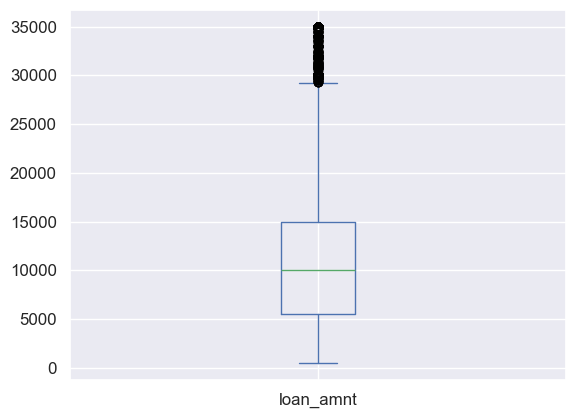

In [589]:
# Plot box graph with loan_amnt

print(loan_data.shape)
print(loan_data["loan_amnt"].describe())
loan_data['loan_amnt'].plot(kind='box')

### Univariate Analysis

In [662]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [280]:
#Bucketing different varaibles for better analysis

In [590]:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan_data['loan_amnt_b'] = loan_data.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [591]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_data['annual_inc_b'] = loan_data.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [592]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_data['int_rate_b'] = loan_data.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [593]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_data['dti_b'] = loan_data.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [594]:
# Write univariants function
def plot_digram(df, column):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plt.tight_layout()
    plt.show()

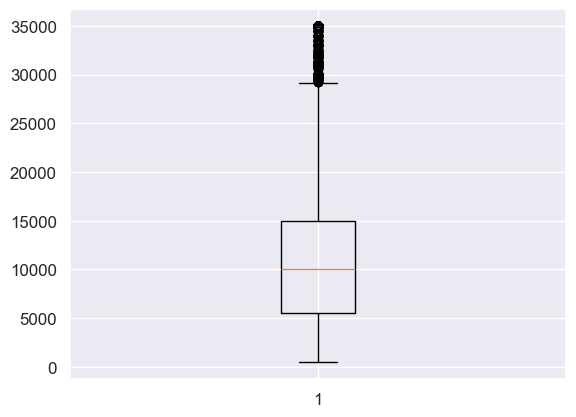

In [595]:
plt.boxplot(loan_data['loan_amnt'],)
plt.show()

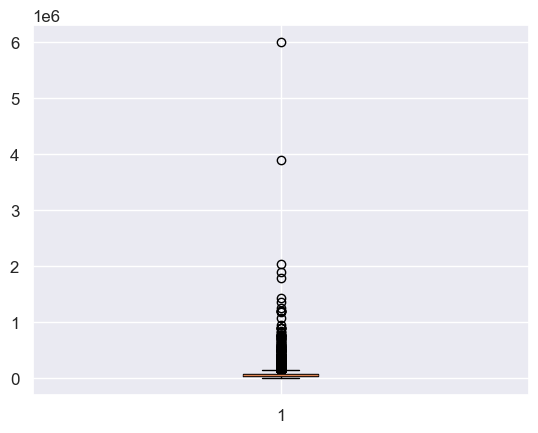

In [596]:
plt.boxplot(loan_data['annual_inc'])
plt.show()

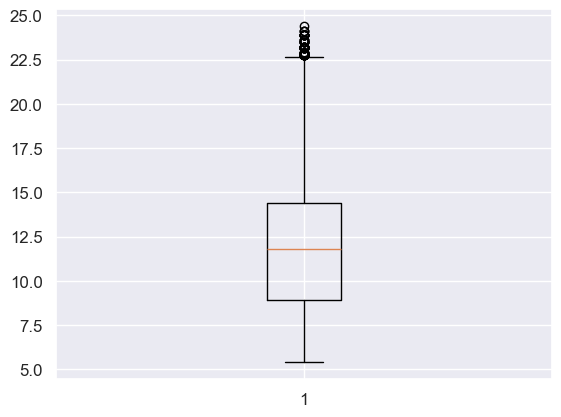

In [597]:
plt.boxplot(loan_data['int_rate'])
plt.show()

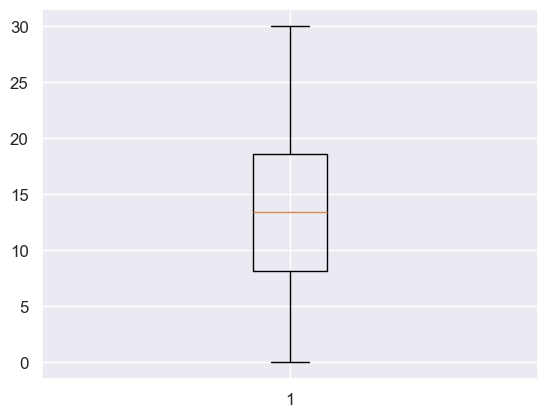

In [598]:
plt.boxplot(loan_data['dti'])
plt.show()

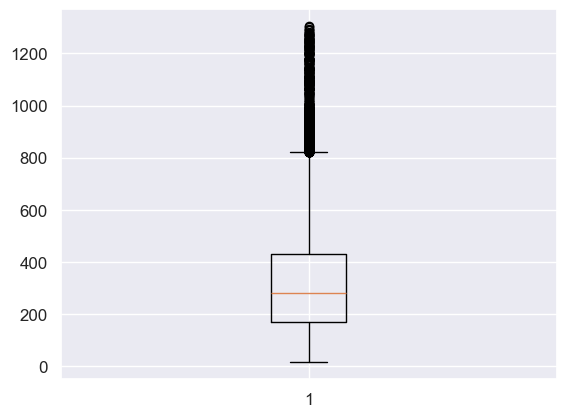

In [599]:
plt.boxplot(loan_data['installment'])
plt.show()

In [321]:
#  check outlier using box plot and then remove the outliers as per requirement
#------------------------------------------------------------------------------

In [600]:
# From above box plts we can see there is otliers exits for columns'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.
# Lets remove the outlier
outliers_columns_set1= ['loan_amnt', 'funded_amnt']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(ldata, columns,threshold):
    for col in columns:
        Q1 = ldata[col].quantile(0.25)
        Q3 = ldata[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        ldata = ldata[(ldata[col] >= lower_bound) & (ldata[col] <= upper_bound)]
    return ldata

# Remove outliers from the DataFrame
loan_data = remove_outliers_iqr(loan_data, outliers_columns_set1,1.5)
loan_data = remove_outliers_iqr(loan_data, outliers_columns_set2,1.5)

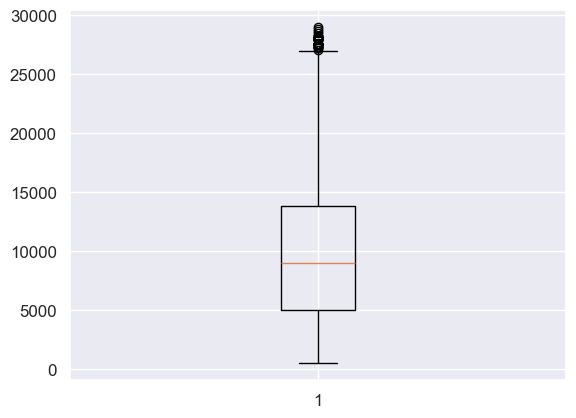

In [601]:
plt.boxplot(loan_data['loan_amnt'])
plt.show()

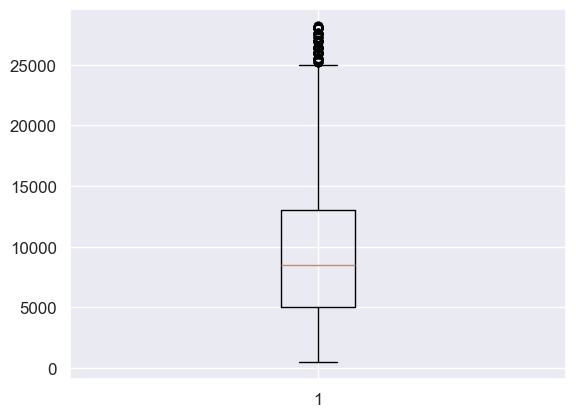

In [602]:
plt.boxplot(loan_data['funded_amnt'])
plt.show()

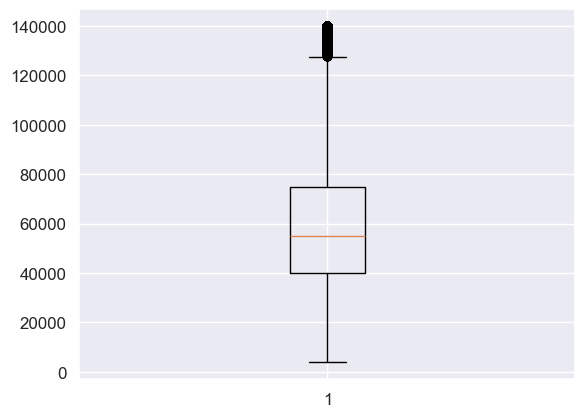

In [603]:
plt.boxplot(loan_data['annual_inc'])
plt.show()

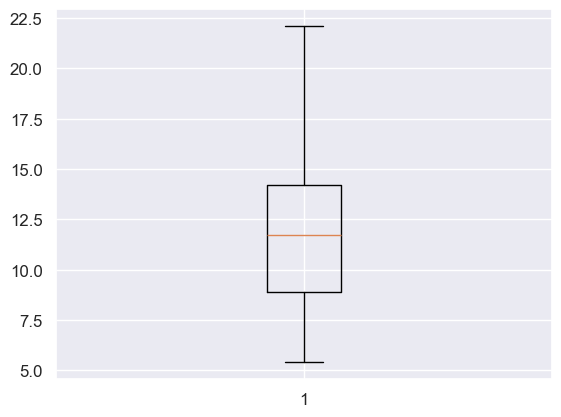

In [604]:
plt.boxplot(loan_data['int_rate'])
plt.show()

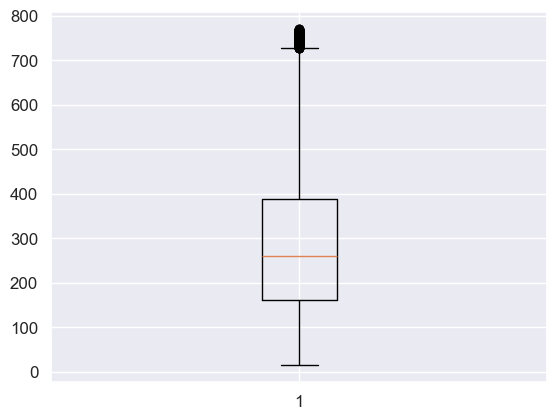

In [605]:
plt.boxplot(loan_data['installment'])
plt.show()

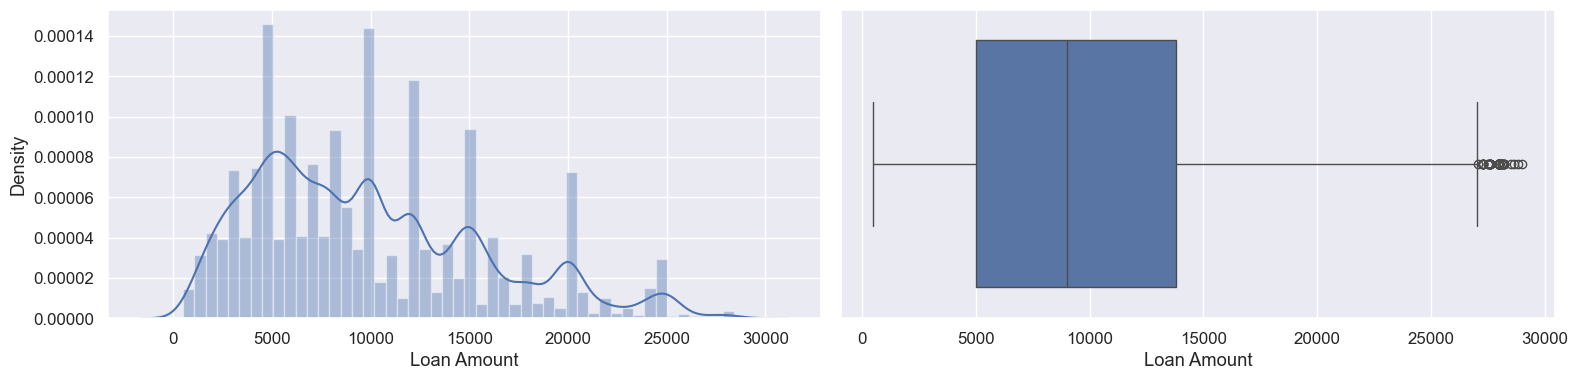

count    33898.000000
mean      9847.310313
std       5857.957440
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13800.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [607]:
plot_digram(loan_data, 'loan_amnt')
loan_data['loan_amnt'].describe()

 
**Graph Observations:**
- The distribution of loan amounts is right-skewed, with a majority of loans falling between $5,000 and $15,000.
- The mean loan amount is around $11,000.
- There are a few outliers on the higher end, indicating some loans significantly larger than the average.

 

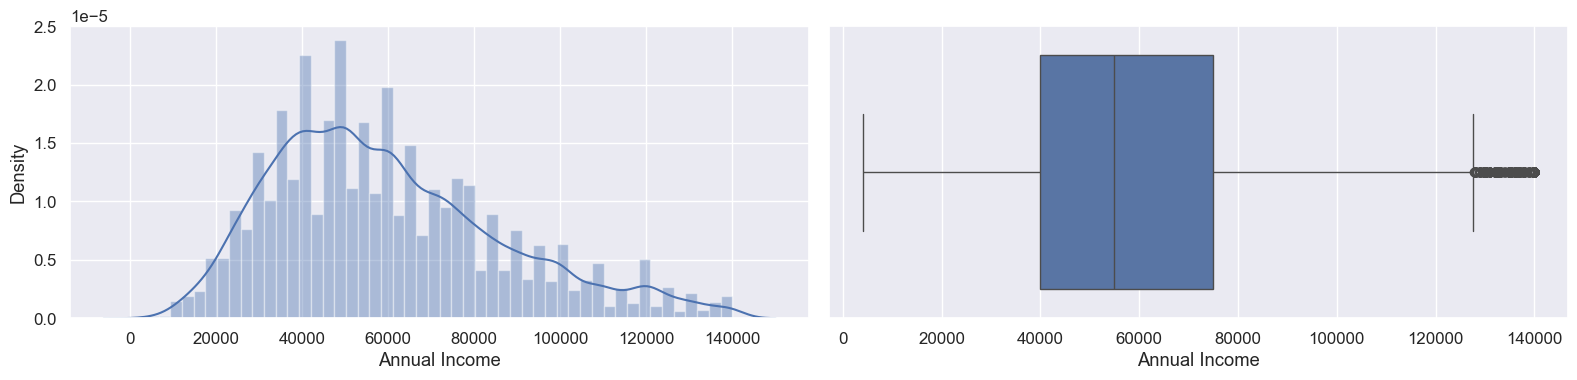

count     33898.000000
mean      59877.533466
std       26963.840579
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [663]:
plot_digram(loan_data, 'annual_inc')
loan_data['annual_inc'].describe()

 
**Graph Observations:**
- The distribution of annual incomes is heavily right-skewed, indicating a concentration of borrowers with lower incomes and a long tail of high earners.
- The mean annual income is around $65,000, but the median is likely lower due to the skew.
- There are potential outliers on the higher end, suggesting a small number of borrowers with significantly higher incomes compared to the majority.
  

In [610]:
# The Annual income of most if applicants lies between 40k-75k.
print("Average Annual Income is :", round(loan_data['annual_inc'].mean(),0))

Average Annual Income is : 59878.0


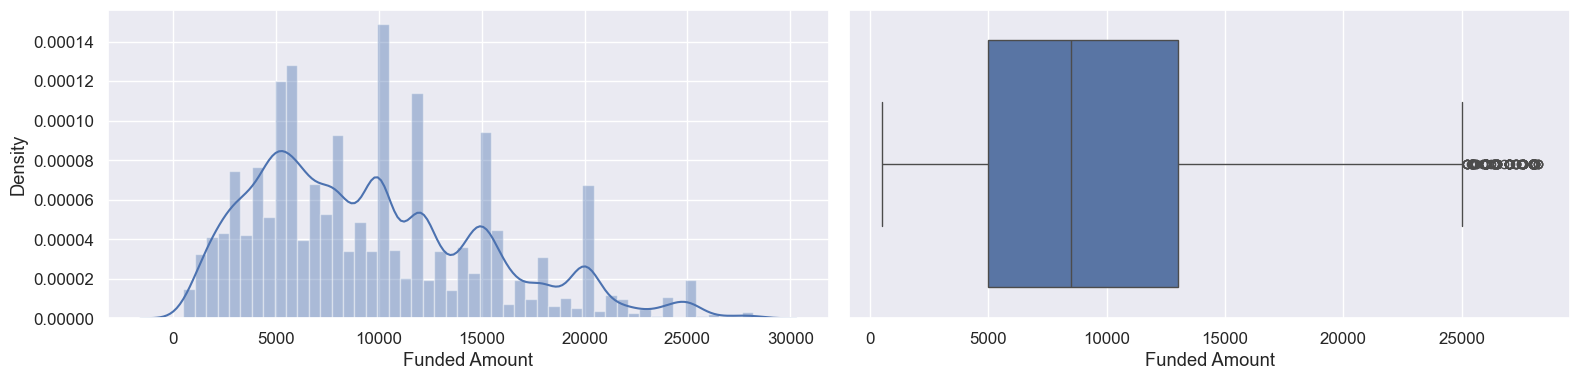

count    33898.000000
mean      9623.237359
std       5621.338357
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28200.000000
Name: funded_amnt, dtype: float64

In [611]:
plot_digram(loan_data, 'funded_amnt')
loan_data['funded_amnt'].describe()

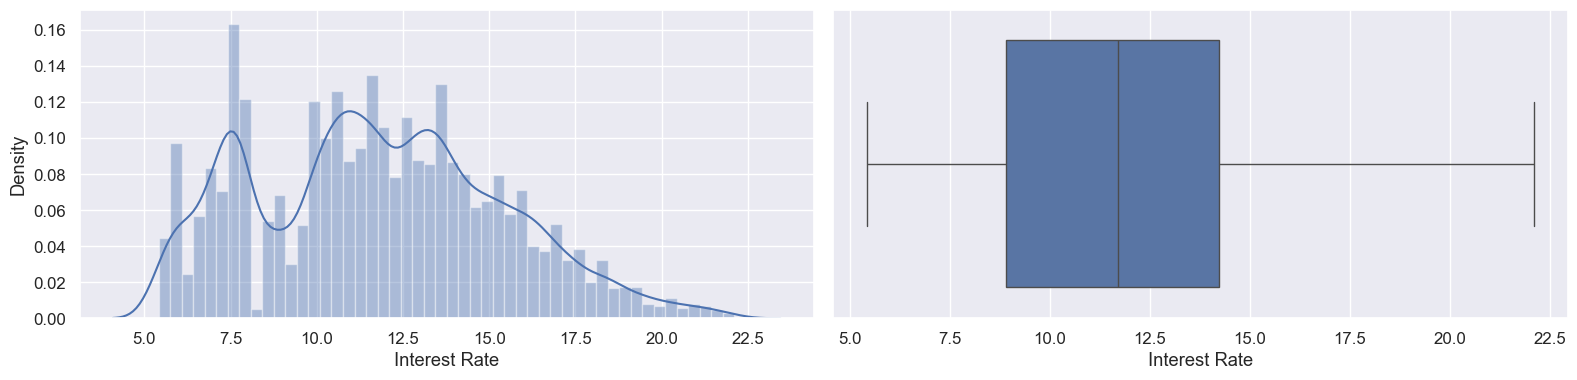

count    33898.000000
mean        11.769485
std          3.577715
min          5.420000
25%          8.900000
50%         11.710000
75%         14.220000
max         22.110000
Name: int_rate, dtype: float64

In [613]:
plot_digram(loan_data, 'int_rate')
loan_data['int_rate'].describe()

 
**Graph Observations:**
- The distribution of interest rates appears to be bimodal, with peaks around 10% and 13%.
- The mean interest rate is approximately 12%.
- There are no significant outliers in the interest rate distribution.
- The interest rate for most of the loans lies between 9%-14%.

### Unordered Categorical Variable Analysis

<Axes: xlabel='home_ownership'>

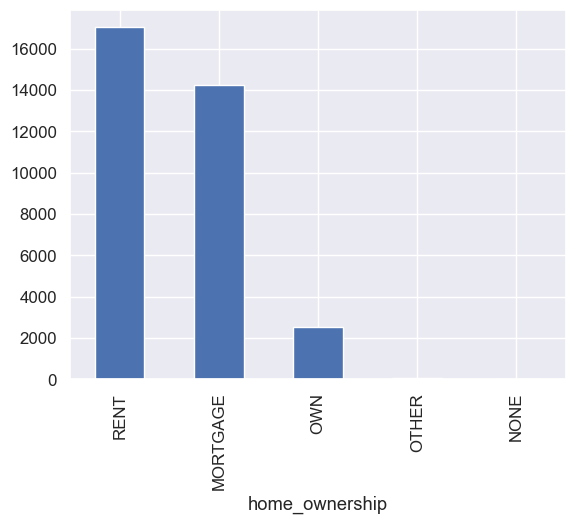

In [614]:
# 1. home_ownership
loan_data['home_ownership'].value_counts().plot.bar()

**Graph observation:**
Most of the loan applicants either living in rented house or mortgaged their house.


<Axes: xlabel='purpose'>

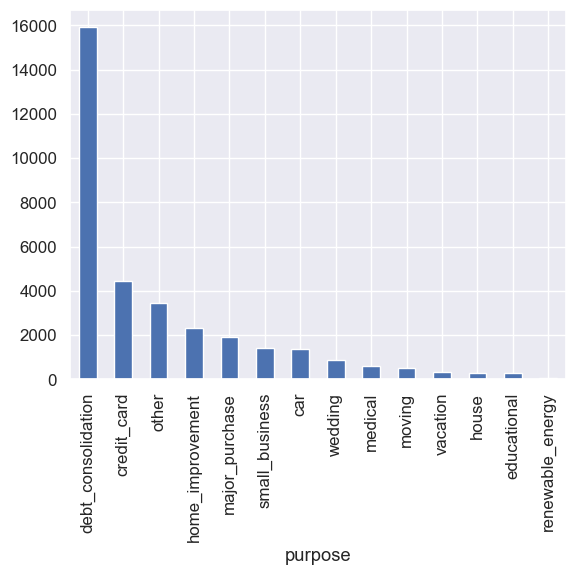

In [615]:
# 2. purpose
loan_data['purpose'].value_counts().plot.bar()

**Graph observation:**
Most of the loan applicants are for debt_consolidations.

In [616]:
Failed_Per_HouseOwner_Ship = loan_data
Failed_Per_HouseOwner_Ship["loan_status"].value_counts()

loan_status
Fully Paid     29072
Charged Off     4826
Name: count, dtype: int64

<Axes: ylabel='count'>

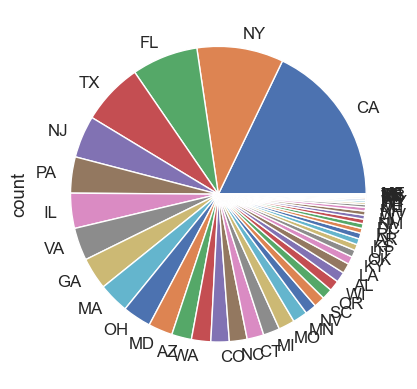

In [617]:
# Using Pieplot to visualize
loan_data['addr_state'].value_counts().plot(kind="pie")

**Graph Observation:** Most of the loan applicants are from CA state.

### Ordered Categorical Variable Analysis

<Axes: ylabel='count'>

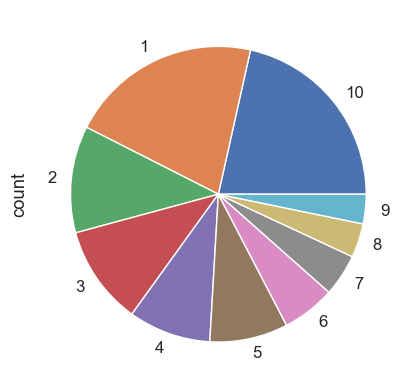

In [618]:
# 1. emp_length:
loan_data['emp_length'].value_counts().plot(kind="pie")

**Graph Observation:** Most of the applications are having 10+ yrs of Exp.

### Bivariate Analysis

### Annual income Vs Charged off_Proportion ###


In [619]:
inc_range_vs_loan  = loan_data.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending = False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1605,7515,9120,0.175987
2,50k to 60k,802,4508,5310,0.151036
1,40k - 50k,818,4676,5494,0.148890
3,60k to 70k,503,3319,3822,0.131606
4,70k to 80k,395,2809,3204,0.123283
5,80k - above,703,6245,6948,0.101180


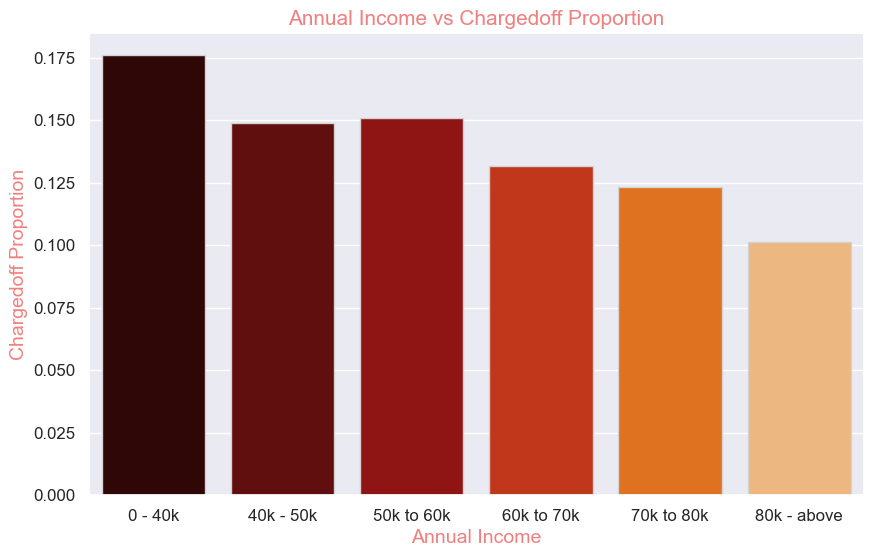

In [620]:
# Now Lets draw bar plots on data calculated above and try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(10, 6) )
ax1.set_title('Annual Income vs Chargedoff Proportion', fontsize=15, color='#F08080')
ax1 = sns.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan, palette='gist_heat', edgecolor ='#D3D3D3')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='#F08080')
ax1.set_xlabel('Annual Income', fontsize=14, color='#F08080')

plt.show()

**Graph Observation:** 

- Applicants with lower annual income are more likely to default on loans compared to those with higher annual incomes.
- This suggests that income level is a significant factor in assessing credit risk.
- Income range 80000+  has less chances of charged off.
- Income range 0-40000 has high chances of charged off.
- Increase in annual income charged off proportion got decreased.

### Intrest Rate Vs Charged off_Proportion ###

In [621]:
interest_vs_loan = loan_data.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1682,4794,6476,0.259728
0,High,1001,4909,5910,0.169374
2,Moderate,1006,5784,6790,0.148159
1,Low,612,5193,5805,0.105426
4,Very Low,525,8392,8917,0.058876


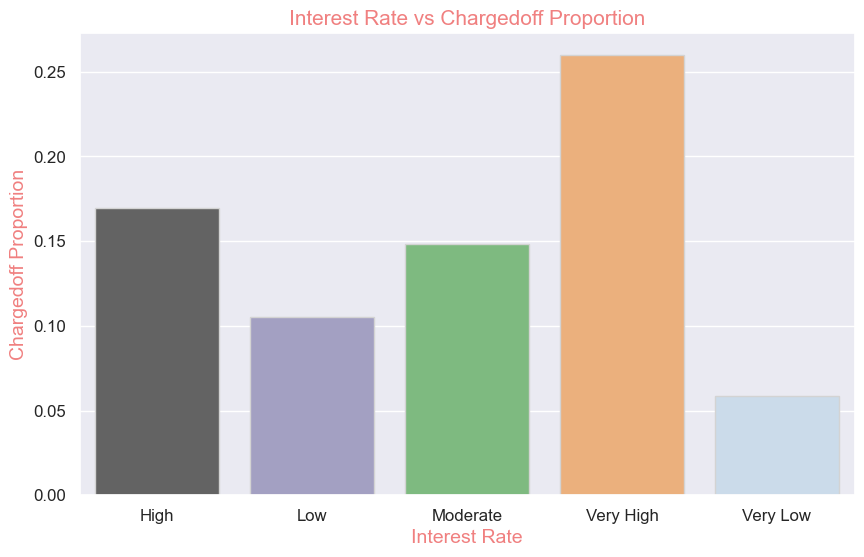

In [622]:
# Now Lets draw bar plots on data calculated above and try to visualize the pattern to understand the data better.
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Interest Rate vs Chargedoff Proportion', fontsize=15, color='#F08080')
ax1 = sns.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan, palette='tab20c_r', edgecolor='#D3D3D3')
ax1.set_xlabel('Interest Rate', fontsize=14, color='#F08080')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='#F08080')
plt.show()

**Graph Observation:** 

- Loans with higher interest rates have a significantly higher proportion of charge-offs.
- This indicates that interest rate is a strong predictor of default risk, with higher rates associated with increased likelihood of loan default.
- interest rate less than 10% or very low has very less chances of charged off. Intrest rates are starting from minimum 5 %.
- interest rate more than 16% or very high has good chnaces of charged off as compared to other category intrest rates.
- Charged off proportion is increasing with higher intrest rates.

### Home Ownership Vs Chargedoff_Proportion

Another inference form - The houseowner variable who are not owning the house are most likely to be charged off.



In [623]:
home_ownership_vs_loan = loan_data.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,OTHER,16,73,89,0.179775
4,RENT,2547,14486,17033,0.149533
3,OWN,366,2173,2539,0.144151
0,MORTGAGE,1897,12337,14234,0.133272
1,NONE,0,3,3,0.000000


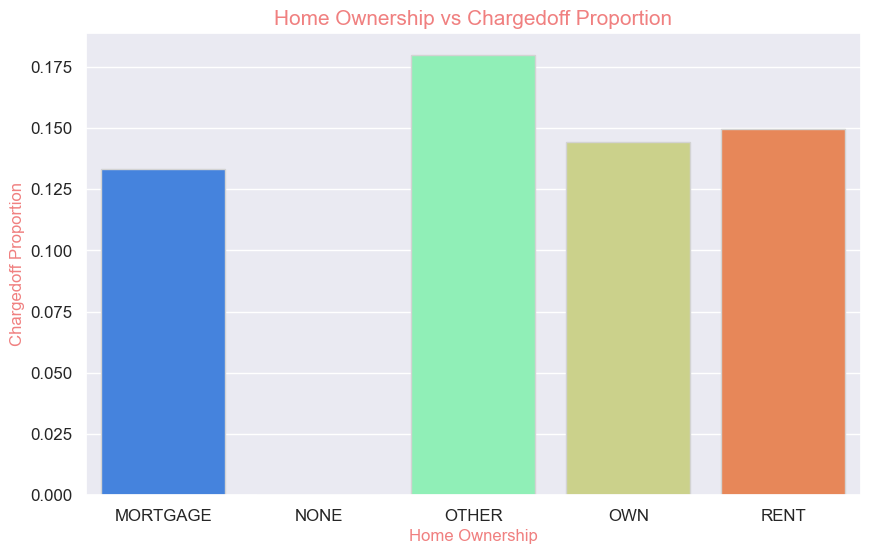

In [624]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15,color='#F08080')
ax1=sns.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan, palette='rainbow', edgecolor='#D3D3D3')
ax1.set_xlabel('Home Ownership',fontsize=12,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color='#F08080')
plt.show()

**Graph Observation:** 

- Those who are not owning the home is having high chances of loan defaults.

### Purpose Vs Chargedoff_Proportion

In [625]:
purpose_vs_loan = loan_data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,379,1033,1412,0.268414
10,renewable_energy,16,67,83,0.192771
5,house,50,251,301,0.166113
3,educational,49,250,299,0.163880
7,medical,97,515,612,0.158497
9,other,546,2912,3458,0.157895
8,moving,82,439,521,0.157390
2,debt_consolidation,2382,13526,15908,0.149736
12,vacation,49,287,336,0.145833
4,home_improvement,285,2057,2342,0.121691


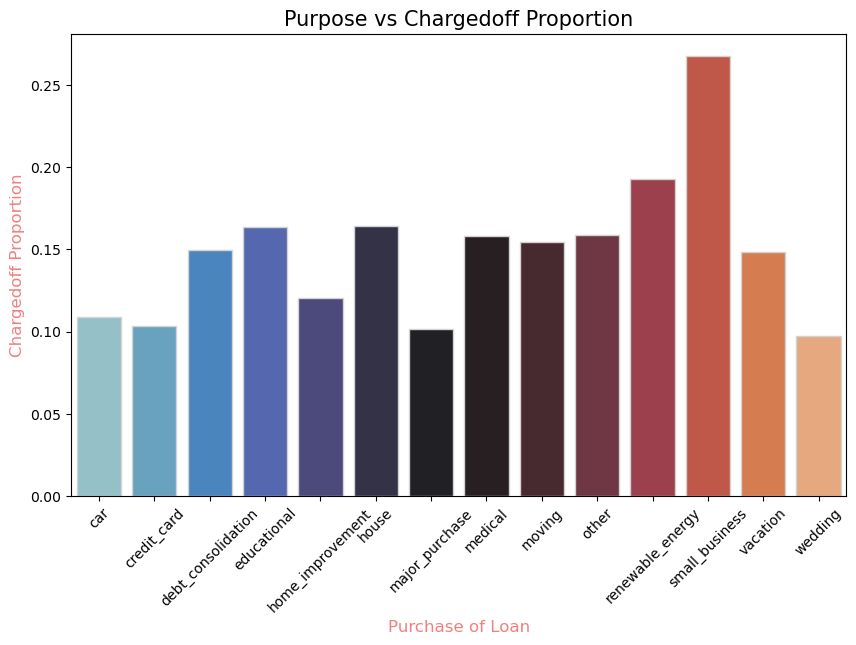

In [460]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan, palette='icefire', edgecolor='#D3D3D3')
ax1.set_xlabel('Purchase of Loan',fontsize=12,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color='#F08080')
plt.xticks(rotation=45)
plt.show()

**Graph Observation:** 

- Those applicants who is having home loan is having low chances of loan defaults.
- Those applicants having loan for small bussiness is having high chances for loan defaults.

### DTI Vs Chargedoff_Proportion

In [626]:
dti_vs_loan = loan_data.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1054,5457,6511,0.161880
0,High,970,5203,6173,0.157136
2,Moderate,1007,5903,6910,0.145731
1,Low,815,5455,6270,0.129984
4,Very Low,980,7054,8034,0.121982


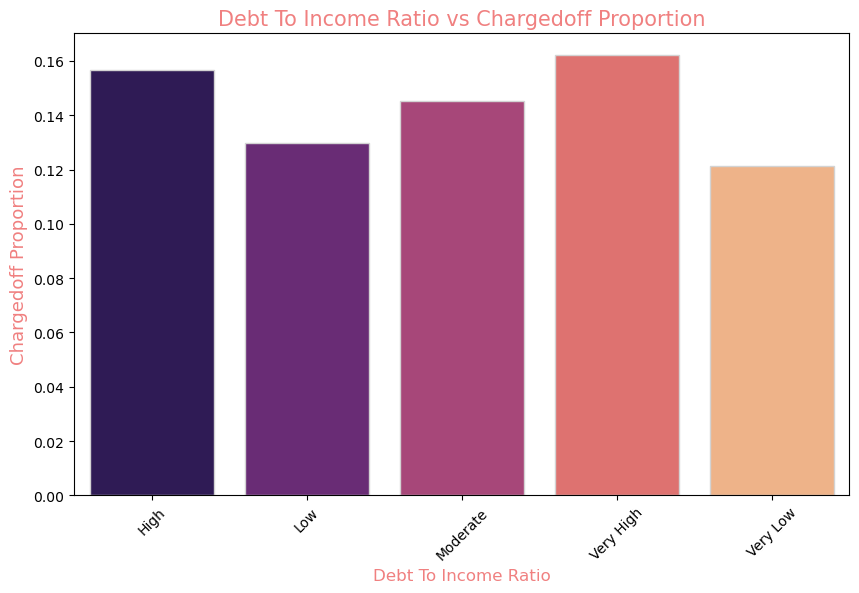

In [464]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion',fontsize=15,color='#F08080')
ax1=sns.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan, palette='magma', edgecolor='#D3D3D3')
ax1.set_xlabel('Debt To Income Ratio',fontsize=12,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=13,color='#F08080')
plt.xticks(rotation=45)
plt.show()

**Graph Observation:** 

- High DTI value  having high risk of defaults.
- Lower the DTO having low chances loan defaults

This suggests that borrowers with higher DTI ratios are more likely to default, indicating a higher risk associated with lending to individuals with a larger debt burden relative to their income.

### Bankruptcies Record Vs Chargedoff_Proportion

In [627]:
loan_data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    32446
1.0     1447
2.0        5
Name: count, dtype: int64

In [628]:
# Bankruptcies Record 
pub_rec_bankruptcies_vs_loan = loan_data.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,2.0,2,3,5,0.400000
1,1.0,309,1138,1447,0.213545
0,0.0,4515,27931,32446,0.139154


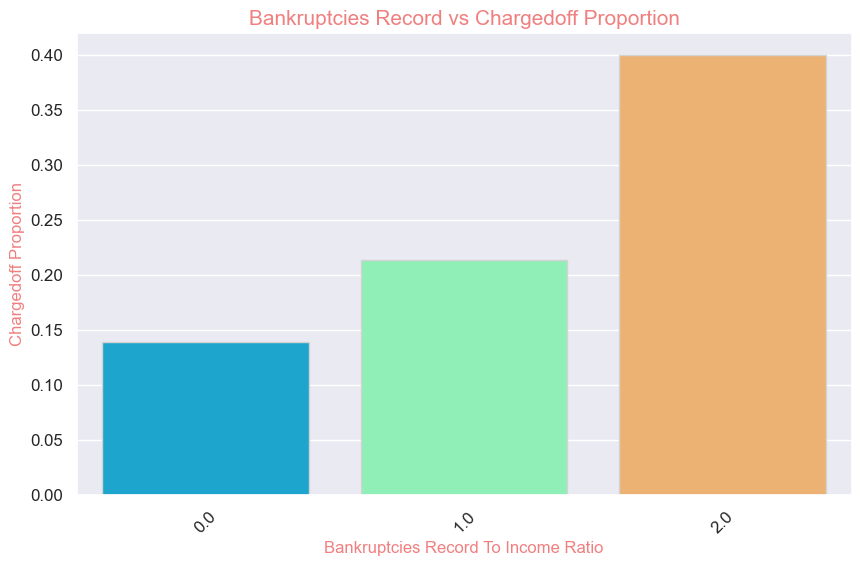

In [630]:
# Plot a graph now...
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion',fontsize=15,color='#F08080')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan, palette='rainbow', edgecolor='#D3D3D3')
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=12,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color='#F08080')
plt.xticks(rotation=45)
plt.show()

**Graph Observation:** 

- Bankruptcies Record with 2 is having high impact on loan defaults.
- Bankruptcies Record with 0 is low impact on loan defaults.
- Lower the Bankruptcies lower the risk.

### Issues of Year Vs Chargedoff_Proportion



In [631]:
issue_year_vs_loan = loan_data.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,issue_year,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,2007,36,181,217,0.165899
4,2011,2717,14850,17567,0.154665
1,2008,221,1229,1450,0.152414
3,2010,1312,9017,10329,0.127021
2,2009,540,3795,4335,0.124567


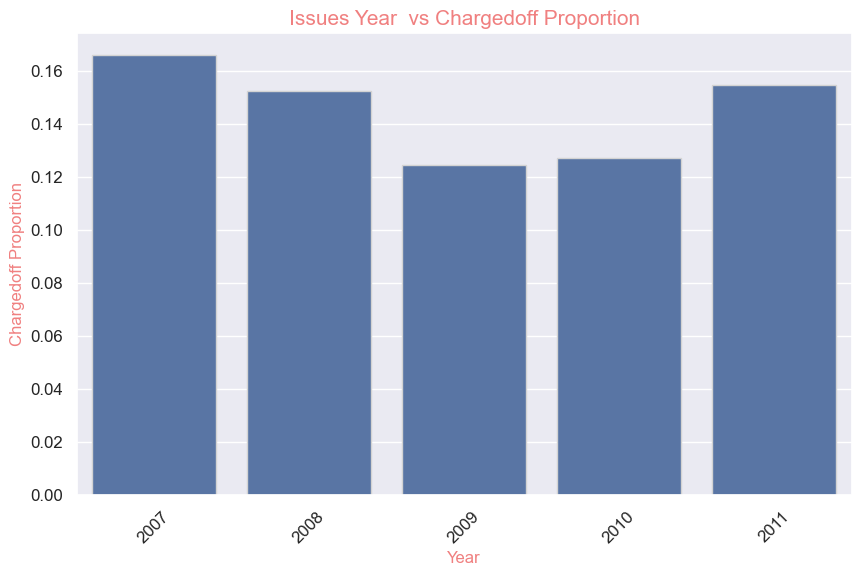

In [632]:
# Plot graph now...
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Issues Year  vs Chargedoff Proportion',fontsize=15,color='#F08080')
ax1=sns.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan, edgecolor='#D3D3D3')
ax1.set_xlabel('Year',fontsize=12,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color='#F08080')
plt.xticks(rotation=45)
plt.show()

**Graph Observation:** 

- Loans issued in earlier years (2007 and 2008) show a higher proportion of charge-offs compared to those issued in later years.
- Year 2009 is having lowest loan defaults.
- This could be attributed to various factors, including the economic conditions prevalent during those years or changes in lending practices over time.


### 'Month of Issue' of loan Vs Chargedoff_Proportion

In [633]:
issue_month_vs_loan = loan_data.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,issue_month,Charged Off,Fully Paid,Total,Chargedoff_Proportion
8,9,482,2555,3037,0.158709
11,12,583,3108,3691,0.157952
4,5,403,2192,2595,0.155299
9,10,471,2738,3209,0.146775
5,6,411,2396,2807,0.146420
10,11,501,3008,3509,0.142776
6,7,416,2558,2974,0.139879
7,8,410,2587,2997,0.136803
0,1,286,1849,2135,0.133958
3,4,319,2184,2503,0.127447


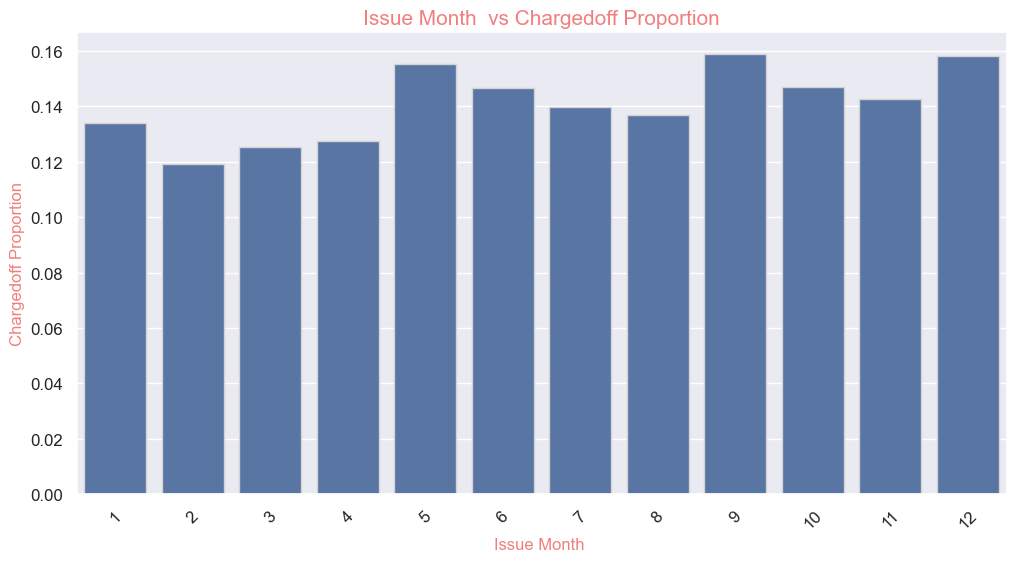

In [634]:
# Plot a graph now...
fig, px = plt.subplots(figsize=(12, 6))
px.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='#F08080')
px=sns.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan, edgecolor='#D3D3D3')
px.set_xlabel('Issue Month ',fontsize=12,color='#F08080')
px.set_ylabel('Chargedoff Proportion',fontsize=12,color='#F08080')
plt.xticks(rotation=45)
plt.show()

**Graph Observation:** 

- Those loan has been issued in May, September and december is having high number of loan defaults.
- Those loan has been issued in month of February is having low number of loan defaults.
- Majority of loan defaults comig from applicants whose loan has been approved from September-to Deceber.

The month in which a loan is issued might not be a strong predictor of default risk.


### Address State Vs Chargedoff_Proportion


In [638]:
addr_state_vs_loan = loan_data.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off'] + addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=True, inplace=True)


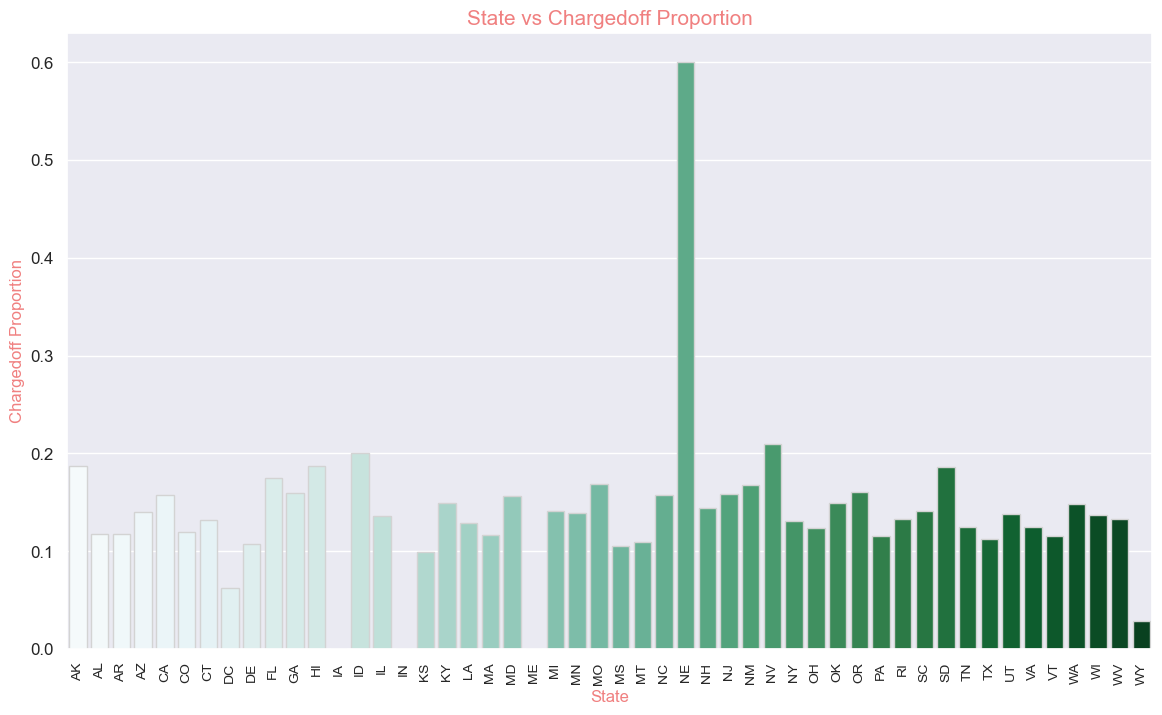

In [639]:
# Plot a graph now...
fig, px = plt.subplots(figsize=(14, 8))  # Increased figure width
px.set_title('State vs Chargedoff Proportion', fontsize=15, color='#F08080')
px = sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan, palette='BuGn', edgecolor='#D3D3D3')
px.set_xlabel('State', fontsize=12, color='#F08080')
px.set_ylabel('Chargedoff Proportion', fontsize=12, color='#F08080')

# Rotate x-axis labels to 90 degrees and reduce font size
plt.xticks(rotation=90, fontsize=10, ha='center')

# Show the plot
plt.show()


**Graph Observation:** 

- States like NV, AK, FL are having high chances of loan defaults.
- States like IA, ME, ID are having low chances of loan defaults. 


### Grade Vs Chargedoff_Proportion

In [640]:
grade_vs_loan = loan_data.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,56,106,162,0.345679
5,F,225,495,720,0.312500
4,E,565,1555,2120,0.266509
3,D,975,3410,4385,0.222349
2,C,1210,5851,7061,0.171364
1,B,1250,9041,10291,0.121465
0,A,545,8614,9159,0.059504


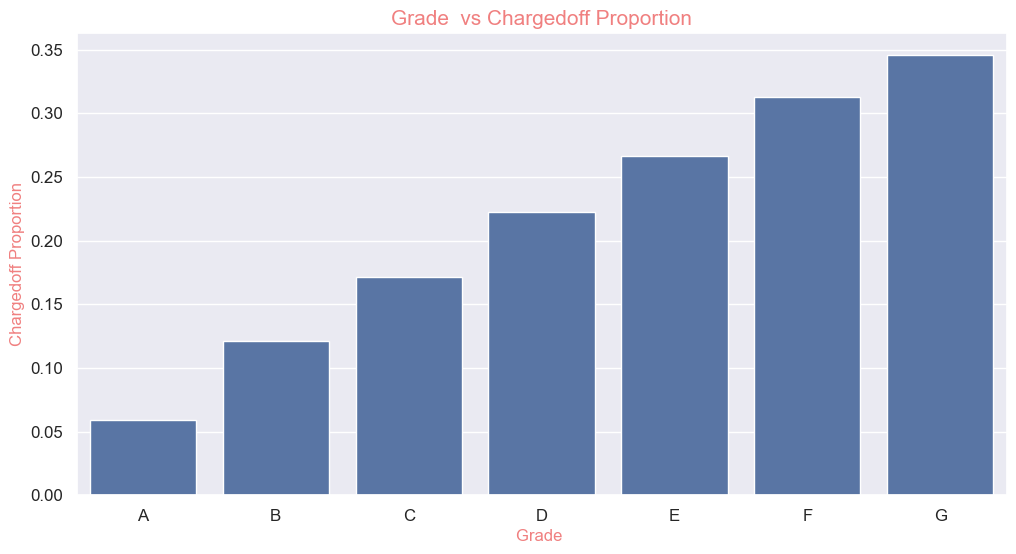

In [641]:
# Plot a graph now...
fig, px = plt.subplots(figsize=(12, 6))
px.set_title('Grade  vs Chargedoff Proportion',fontsize=15,color='#F08080')
px=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
px.set_xlabel('Grade ',fontsize=12,color='#F08080')
px.set_ylabel('Chargedoff Proportion',fontsize=12,color='#F08080')
plt.show()

**Graph Observation:** 

- The Loan applicants with loan Grade G is having higest Loan Defaults and loan applicants with loan A is having lowest Loan Defaults.

### Correlation Analysis

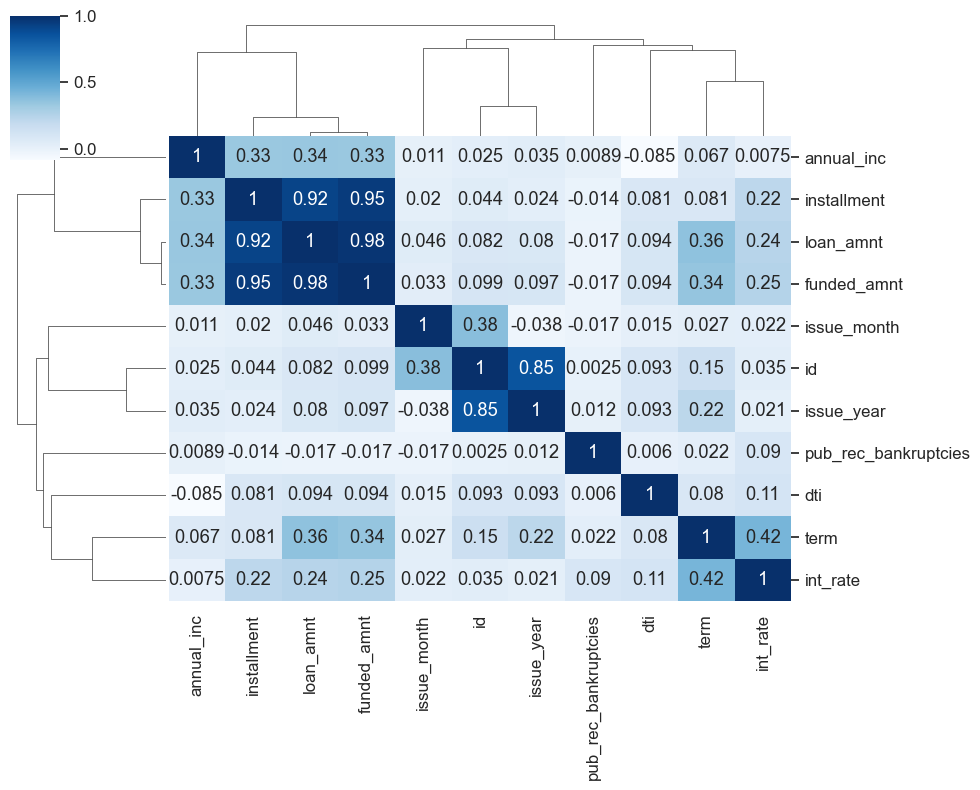

In [642]:
# Plot a graph now...
corr_loan = loan_data.select_dtypes(include=['number'])
corr = corr_loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(10, 8), cmap="Blues")

plt.show()

### Observations on correlation graph

1) Positive Correlations:
      - Loan amount, funded amount and investor-funded amount are strongly positively correlated,
             indicating that larger loan requests generally receive higher funding.
      - Interest rate shows a moderate positive correlation with loan amount, suggesting that larger loans tend to have higher interest
             rates.
      - Installment amount is strongly correlated with loan amount and funded amount, reflecting the direct relationship between
             loan size and monthly payments.    


2) Negative Correlations:
    - Public record bankruptcies exhibit a weak negative correlation with annual income, implying that individuals with higher
         incomes are less likely to have a history of bankruptcies.

3) Overall:
    - The heatmap reveals the interdependencies among various numerical variables in the loan dataset.
    - These correlations can be leveraged to gain insights into factors influencing loan approval, interest rates, and the likelihood of default.
      

In [643]:
drop_columns = ['installment', 'id', 'issue_year', 'issue_month']
corr_loan = corr_loan.drop(columns=drop_columns)

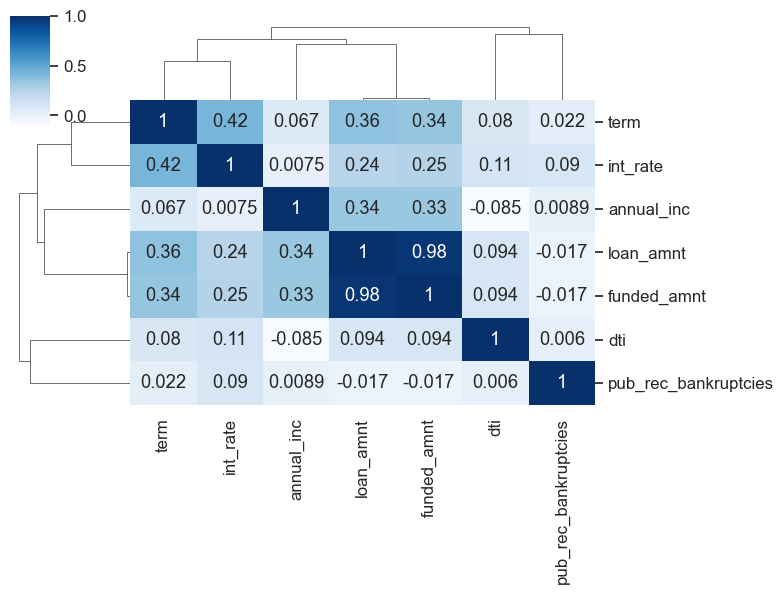

In [644]:
corr = corr_loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(8, 6), cmap="Blues")
plt.show()

- Negative Correlation:

        1.loan_amnt has negative correlation with pub_rec_bankrupticies        
        2.annual income has a negative correlation with dti
        
- Strong Correlation:
        
        1.term has a strong correlation with loan amount        
        2.term has a strong correlation with interest rate        
        3.annual income has a strong correlation with loan_amount

<Axes: xlabel='term', ylabel='loan_amnt'>

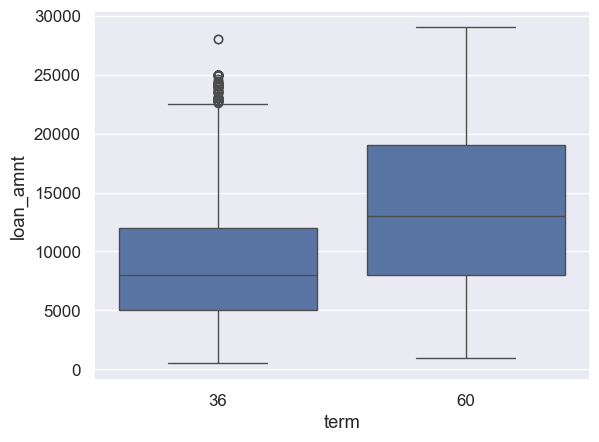

In [645]:
sns.boxplot(x = 'term', y = 'loan_amnt', data = corr_loan)


### Observation on graph

 This graph indicates a bivariate analysis of the relationship between loan term ('term') and loan amount ('loan_amnt').
 Specifically, it's a box plot visualization that allows us to compare the distribution of loan amounts for different loan terms (e.g., 36 months vs. 60 months).

 Key insights that can be derived from this box plot include:

 - **Median Loan Amount**: The horizontal line within each box represents the median loan amount for that term. We can observe whether loans with longer terms tend to have higher or lower median amounts.
 - **Interquartile Range (IQR)**: The box itself spans the interquartile range (IQR), which contains the middle 50% of the data. This gives us an idea of the spread or variability of loan amounts within each term category.
 - **Outliers**: The dots or circles beyond the "whiskers" of the box plot represent outliers, which are loan amounts that are significantly higher or lower than the majority of loans for that term.
 - **Distribution Shape**: The shape of the box and whiskers can provide clues about the distribution of loan amounts. For instance, a longer upper whisker might suggest a right-skewed distribution, indicating a greater number of larger loan amounts.

 By analyzing this box plot, we can gain a deeper understanding of how loan term and loan amount are related and whether there are any notable differences in loan amount distributions for different terms.


##### From the above graph we can see that if term is increasing then loan amount is also increasing.

<Axes: xlabel='term', ylabel='int_rate'>

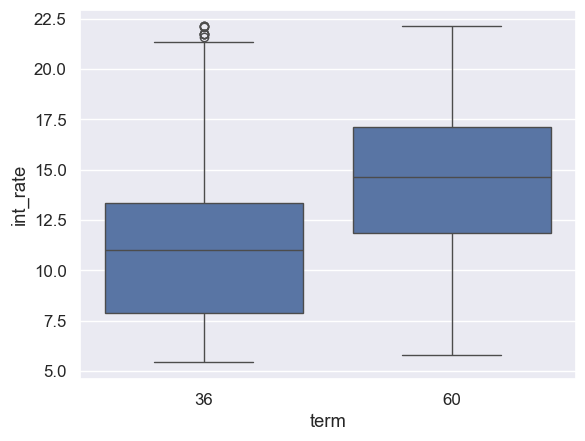

In [647]:
sns.boxplot(x = 'term', y = 'int_rate', data=corr_loan)

#### Observation:
- This code performs univariate and bivariate analysis on a loan dataset.
 It visualizes distributions, relationships between variables, and correlations.

- The last two boxplots indicate a comparison of loan amount and interest rate across different loan terms (likely short-term and long-term).
- This analysis helps understand how the loan amount and interest rate vary based on the chosen loan term.


---

## 4. Conclusion on Data Analysis
#### Summary

- Loan applicants with lower income and higher interest rates are more likely to default.
- Borrowers who don't own homes and have a history of bankruptcies also pose higher risk.
- Loan purpose influences default rates, with small business loans being riskier.
- Loans issued in earlier years (2007-2008) show higher charge-off rates.
- States like NV, AK, FL exhibit higher default rates compared to IA, ME, ID.

-----------
